# Voltage & Current Server Calculations
Below are the calculations performed by the server on the data recieved from the board. 

In [1]:
# Import needed libraries, and variables
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
from power_analyzer.settings import V_IN, I_IN

In [2]:
# Define some functions to quickly make graphs.
def graph(values, x_label="", y_label=""):
    # Uncomment the bellow line for high-res graphs 
    # plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    x = np.arange(len(values))
    plt.scatter(x, values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def graph_tuple(t_values, x_label="", y_label=""):
    # Uncomment the bellow line for high-res graphs 
    # plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    x = np.arange(len(t_values[0]))
    for idx, values in enumerate(t_values):
        plt.scatter(x, values, label=str(idx))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper left')
    plt.show()

## Paste data here
Below is some raw data we've measured from the device. There is a good variety of data. Including voltage measurements that are rectified and measurements that are taken when there was no current flowing through the Current Transformer (CT). 

In [3]:
# voltages = [835,823,798,768,725,676,621,567,489,428,361,316,272,246,193,174,163,176,186,214,252,300,346,406,459,540,605,662,705,750,786,814,834,835,824,802,773,729]
# currents = [835,823,798,768,725,676,621,567,489,428,361,316,272,246,193,174,163,176,186,214,252,300,346,406,459,540,605,662,705,750,786,814,834,835,824,802,773,729]

In [4]:
# One wierd current (TODO: Check to make sure that one point isn't causing a problem.)
# voltages = [343,283,238,205,184,183,194,218,242,285,333,387,446,513,582,643,689,737,761,812,832,841,824,812,783,746,693,642,585,533,449,382]
# currents = [457,437,440,450,461,471,480,487,492,495,495,494,489,484,476,465,454,442,432,421,404,393,384,376,369,367,365,366,368,374,379,391]

In [5]:
# Rectified data
# voltages = [125,94,65,36,8,0,0,0,0,0,0,0,0,0,0,0,18,43,72,98,133,162,187,205,223,234,238,237,233,223,209,183,158,0,0]
# currents = [189,162,130,106,72,46,21,4,0,0,0,0,0,0,4,31,57,85,112,144,172,200,228,248,266,280,288,290,286,279,266,249,222,194,0]

In [6]:
# bad data (No Current from CT)
# voltages = [104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,0,0]
# currents = [123,123,123,123,123,124,124,124,123,123,124,123,123,123,123,123,123,123,123,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,0]

In [7]:
# Data calculated today
#voltages = [49,32,38,52,91,149,232,320,404,498,586,689,778,866,933,996,1024,1024,1024,1024,1012,967,883,805,718,630,533,454,345,255,176,114,0,0,0]
#currents = [365,364,363,365,369,375,386,394,406,420,433,442,457,466,477,485,493,495,494,493,490,485,480,466,456,445,433,421,403,394,384,376,368,366,0]

In [8]:
# 1
voltages = [438,322,238,178,118,90,66,66,72,100,136,213,288,370,451,543,609,721,805,878,931,982,1008,1020,1014,1000,961,922,834,753,672,590,0,0,0]
currents = [417,401,392,381,374,368,364,364,365,367,373,377,389,401,412,426,436,446,460,471,480,487,490,494,494,492,488,484,475,464,451,441,429,416,400]

In [9]:
ideal_voltages = 120*np.sin(np.arange(32)*2*math.pi/32)

# Voltage
This section converts raw measurements from the Analogue to Digital Coverter (ADC) to the voltages that were being measured.

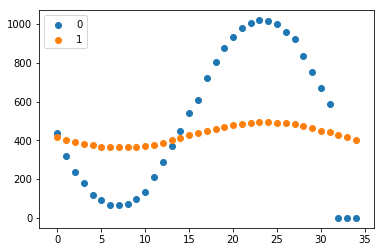

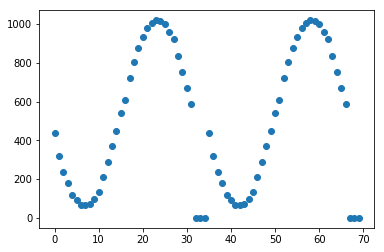

In [10]:
# Take a look at the data we have to look at.
graph_tuple((voltages, currents))
# print((len(voltages), len(ideal_voltages)))
# graph_tuple((voltages, ideal_voltages))

# Visually test the periodicy (is this a word?) of the wave. 
graph(np.concatenate((voltages, voltages), axis=0))

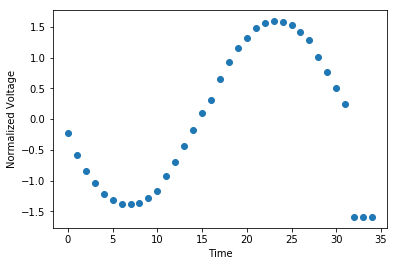

Min: -1.59375 Max: 1.59375


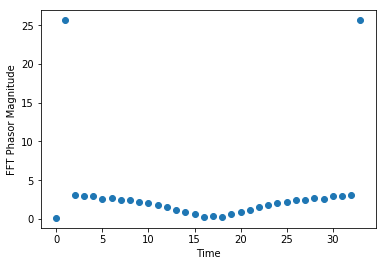

In [11]:
# The core of the calculation

np_voltages = np.array(voltages)
Vin = V_IN

# translated_v = (np_voltages/Vin["num_bits"])*Vin["max_val"]

# Vmax = max(translated_v)
# Vmin = min(translated_v)
# offset = (Vmin + Vmax)/2.0

# translated_v = (translated_v - offset)/Vin["scale_factor"] / math.sqrt(2)

#Test
translated_v = ((np_voltages/1024*3.2))

Vmax = max(translated_v)
Vmin = min(translated_v)
offset = (Vmin + Vmax)/2.0

translated_v = (translated_v - offset)

graph(translated_v, x_label="Time", y_label="Normalized Voltage")
v_min = min(translated_v)
v_max = max(translated_v)
print("Min: " + str(v_min) + " Max: " + str(v_max))
fft = np.fft.fft(translated_v, 34)
graph(np.absolute(fft), x_label="Time", y_label="FFT Phasor Magnitude")
abs_fft = np.absolute(fft)

In [12]:
abs_fft[33]

25.624320874642667

In [13]:
abs_fft[1]/34*2/math.sqrt(2)

1.0658312384564603

## Calculated complex voltage
This section outputs the calculated complex voltage, it's magnitude and phase.

In [14]:
final_voltage = fft[1]/17/(0.8210632221e-2+0.1164355735e-3j)
final_voltage

(-84.3045854963006+163.05767835275984j)

In [15]:
np.absolute(final_voltage/math.sqrt(2))

129.79805392511696

In [16]:
cmath.phase(final_voltage)*180/math.pi

117.3400079199999

# Current
This is the calculation section for the current. It's a little bit different. It has a magical formula that Nathan derived to convert voltage values measured into the real current values flowing through the wire.

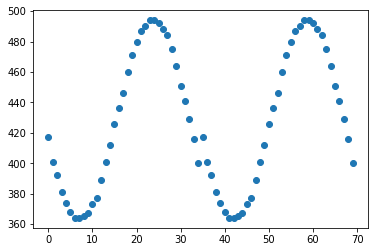

In [17]:
# Define the number of windings on the inductor
N = 2000

# Test the periodicy of the wave. (Data for this one is not as good.)
graph(np.concatenate((currents, currents), axis=0))

{'secondary': 0.2, 'resistance': 42, 'num_bits': 1024, 'scale_factor': 0.45445, 'max_val': 3.1, 'offset': 1.5}


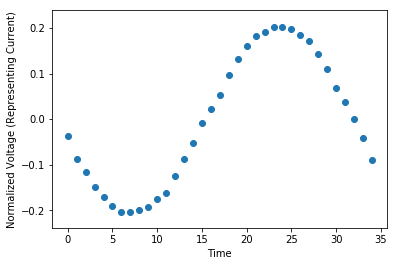

/home/ubuntu/.local/lib/python3.5/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


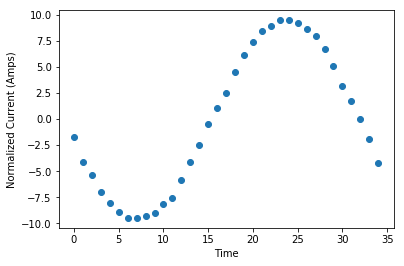

In [18]:
np_currents = np.array(currents)
Iin = I_IN
print(I_IN)
translated_i = ((np_currents/1024*3.2))

Imax = max(translated_i)
Imin = min(translated_i)
offset = (Imin + Imax)/2.0

translated_i = (translated_i - offset)

# Normalize
graph(translated_i, x_label="Time", y_label="Normalized Voltage (Representing Current)")

x = translated_i
# Convert Voltage to current
# (6.406266326*10^12-5.308287991*10^9*I)*N^2*x
# /(2.715290040*10^14*N+(1.326246007*10^9*I)*x-1.600357741*10^12*x)
#translated_i = (6.406266326E3-5.308287991j)*N*N*x \
#            /(2.715290040E5*N+1.326246007j*x-1.600357741E3*x)
translated_i = (5.435676114E3-2.093686304E1j)*N*N*x \
            /(2.333452378E5*N+5.30498089j*x-1.376431233E3*x)

graph(translated_i, x_label="Time", y_label="Normalized Current (Amps)")

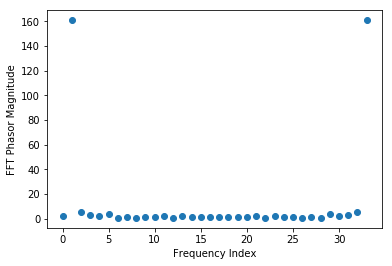

In [21]:
fft_i = np.fft.fft(translated_i, 34)

graph(np.absolute(fft_i), x_label="Frequency Index", y_label="FFT Phasor Magnitude")
abs_fft_i = np.absolute(fft_i)

## Calculated Complex Current
This is the section where the complex current and it's magnitude are outputed.

In [20]:
final_current = fft_i[1]/17
print(final_current, abs(final_current)/math.sqrt(2))

(-2.8079915715342056+9.037871734012482j) 6.6920827156524645
